## Vu H. Chu-Le

## CS110 Fall 2017

---

In [1]:
# Regular merge sort

def merge_2(left, right):    
    # Empty list to contain sorted numbers
    sort = []
    # Index counters
    i, j = 0, 0
    
    # Comparing and sorting numbers into the new list
    while (len(sort) < len(left) + len(right)):
        if left[i] < right[j]:
            sort.append(left[i])
            i+= 1
        else:
            sort.append(right[j])
            j+= 1
        
        # If at the end of either sublist, put the rest of the other
        # sublist into the sorted list and break the loop
        if i == len(left) or j == len(right):
            sort.extend(left[i:] or right[j:])
            break
    return sort

def mergesort(lst):    
    # If there is only one element, then nothing needs to be done
    if len(lst) < 2:
        return lst
    
    # Splitting the original list into two sublists, then call the
    # function recursively to split the sublists further
    middle = len(lst)//2
    left = mergesort(lst[:middle])
    right = mergesort(lst[middle:])
    return merge_2(left, right)

In [2]:
# 3-way merge sort

def merge_3(left, middle, right):
    # Empty list to contain sorted numbers
    sort = []
    # Index counters
    i, j, k = 0, 0, 0
    # Length of the original list
    total_length = len(left) + len(middle) + len(right)
    
    # Comparing and sorting numbers into the new list
    while len(sort) < total_length:
        if left[i] <= middle[j] and left[i] <= right[k]:
            sort.append(left[i])
            i+= 1
        elif middle[j] <= left[i] and middle[j] <= right[k]:
            sort.append(middle[j])
            j+= 1
        else:
            sort.append(right[k])
            k+= 1
            
        # If at the end of one of the sublists, then add a "sentinel"
        # value of infinity at the end and continue comparing
        if i == len(left):
            left.append(float("inf"))
        if j == len(middle):
            middle.append(float("inf"))
        if k == len(right):
            right.append(float("inf"))
    return sort

def mergesort_3(lst):
    # If there is only one element, then nothing needs to be done
    if len(lst) < 2:
        return lst
    
    # If there are two elements, then check if they are in correct
    # order and swap places if needed.
    if len(lst) == 2:
        if lst[0] > lst[1]:
            return [lst[1],lst[0]]
        return lst
    
    # Splitting the original list into three sublists, then call
    # the function recursively to split the sublists further:    
    
    third = len(lst)//3
    # In the case where length of the array is 2, this is equal to
    # zero. Therefore, we need the separate case for length = 2 above. 
    
    left = mergesort_3(lst[:third])
    middle = mergesort_3(lst[third:2*third])
    right = mergesort_3(lst[2*third:])
    return merge_3(left, middle, right)

In [3]:
# Insertion sort algorithm
def insert_sort(lst):
    for j in range(1,len(lst)):
        key = lst[j]
        i = j
        while i > 0 and lst[i-1] > key:
            lst[i] = lst[i-1]
            i -= 1
        lst[i] = key
    return lst

# Augmented merge sort
def mergesort_aug(lst):
    # If there is only one element, then nothing needs to be done
    if len(lst) < 2:
        return lst
    # If there are fewer than ten elements, then implement
    # insertion sort rather than divide the sublist further.
    if len(lst) < 10:
        return insert_sort(lst)
    
    # Splitting the original list into three sublists, then call
    # the function recursively to split the sublists further:
    third = len(lst)//3
    left = mergesort_aug(lst[:third])
    middle = mergesort_aug(lst[third:2*third])
    right = mergesort_aug(lst[2*third:])
    return merge_3(left, middle, right)

In [4]:
from datetime import datetime
from random import randint

# Input: Desired length m of a list
# Output: A list with m random integers with value in the range
# [-1000;1000]
def rand_list(m):
    lis = []
    for _ in range(m):
        lis.append(randint(-1000,1000))
    return lis

# Input: A sort algorithm that takes in a list as the only argument
# Output: Average time the algorithm takes to sort a list of
# 10,000 random integers with value in the range [-1000;1000]
def average_time(function):
    # Empty list to contain all the recorded times
    time = []
    
    # Run the algorithm 1000 times and measure the time it takes each
    # iteration
    for i in range(1000):
        # Create a new list of 10,000 random integers each time
        lst = rand_list(10000)
        start = datetime.now()
        function(lst)
        end = datetime.now()
        # Calculate time taken in seconds
        time.append((end - start).total_seconds())
    return sum(time) / len(time)

---

In [5]:
import pandas

# Print a table with the physical runtime of regular merge sort, 
# three-way merge sort, and the augmented merge sort. Time recorded
# is the average time each algorithm takes to sort a list of 10,000
# random integers with value in the range [-1000;1000]
data = []
for i in [mergesort, mergesort_3, mergesort_aug]:
    data.append(average_time(i))
algorithm_list = ["Merge sort", "3-way merge sort",
                  "Augmented merge sort"]
headers = ["Average time taken (s)"]
pandas.DataFrame(data, algorithm_list, headers)

,Average time taken (s)
Merge sort,0.138266
3-way merge sort,0.125364
Augmented merge sort,0.090551


The table above shows the average time regular merge sort, three-way merge sort, and the augmented merge sort takes to sort a list of 10,000 pseudo-random integers. As we can see, the augmented merge sort is the best variation, while the regular merge sort is the worst variation among the three. To see if this remains true over different lengths of lists (from now on, we will refer to length of list as variable n) to be sorted, we do the same experiment for a range of different n from 100 to 10,000 (each test value is 100 apart) and graph the data recorded below.

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


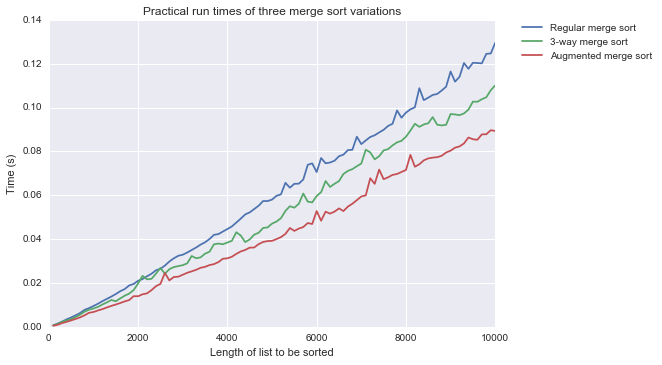

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

# Record the time each of three merge sort variations take to sort
# lists of different lengths:

# Empty lists to contain the physical runtime of the three merge
# sort variations
time_merge, time_merge_3, time_merge_aug = [], [], []

# Create a list containing different lengths of lists to be sorted,
# ranging from 100 to 10,000; each test value is 100 apart.
list_length = range(100, 10001, 100)

# For each length value, calculate and record the time three merge
# sort variations take to sort lists of such length value, then
# store the average time into the corresponding list.
for i in list_length:
    lst = rand_list(i)
        
    start_merge = datetime.now()
    mergesort(lst)
    end_merge = datetime.now()
    time_merge.append((end_merge-start_merge).total_seconds())
        
    start_merge_3 = datetime.now()
    mergesort_3(lst)
    end_merge_3 = datetime.now()
    time_merge_3.append((end_merge_3-start_merge_3).total_seconds())
        
    start_merge_aug = datetime.now()
    mergesort_aug(lst)
    end_merge_aug = datetime.now()
    time_merge_aug.append( \
                    (end_merge_aug-start_merge_aug).total_seconds())

# Plot the physical runtime of regular merge sort
merge_time = plt.plot(list_length, time_merge, 
                      label = "Regular merge sort")
# Plot the physical runtime of 3-way merge sort
merge_3_time = plt.plot(list_length, time_merge_3, 
                        label = "3-way merge sort")
# Plot the physical runtime of augmented merge sort
merge_aug_time = plt.plot(list_length, time_merge_aug, 
                          label = "Augmented merge sort")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Practical run times of three merge sort variations')
plt.xlabel('Length of list to be sorted')
plt.ylabel('Time (s)')
plt.show()

As seen in the line graph above, the efficiency observed is consistent for various n values. This can be explained by looking at the algorithms' recursion relations. Even though both the regular and 3-way merge sort have time complexity of O(n log n), the log base is 2 for regular merge sort and 3 for 3-way merge sort. Since log<sub>2</sub>(x) > log<sub>3</sub>(x), for all x > 2, 3-way merge sort would take less time than regular merge sort in most instances. The augmented merge sort is faster than the 3-way merge sort because much like other quadratic sorting algorithms, insertion sort is efficient for small data sets. The same behavior will be observed again later in the optional challenge.

---

#### Optional challenge

In [7]:
# k-way merge sort:

def merge_k(all_list):
    # Empty list to contain sorted numbers
    sorted_list = []
    
    while all_list: # While there are unsorted elements
        
        # Variables to record the minimum element being compared and 
        # the index of the corresponding sublist
        min_value, index = all_list[0][0], 0
        
        for lst in all_list: # For each sublist, do:
            # If the first element in the list is smaller than the
            # current minimum value, then make it the new value
            # and record the index of the sublist containing it
            if lst[0] < min_value:
                min_value = lst[0]
                index = all_list.index(lst)
        
        # Put the minimun value into the sorted list
        sorted_list.append(min_value)
        # Remove the minimum value from the sublist
        all_list[index].pop(0)
        
        # If a sublist is empty, remove it from the list containing
        # all sublists
        if not all_list[index]:
            all_list.remove(all_list[index])     
    return sorted_list

def mergesort_k(lst, k):
    # If there is only one element, then nothing needs to be done
    if len(lst) < 2:
        return lst
    
    # If the number of elements of a sublist is smaller than k, 
    # then call the function to do a (k-1)-way merge instead of
    # splitting it further into k parts, which is not possible.
    if len(lst) < k:
        return mergesort_k(lst, k-1)
    
    # Create a "master" list to contain all sublists
    all_lst = []
    # Split the original list into k sublists, then call the  
    # function recursively to split the sublists further and put 
    # the results into the "master" list:
    sub_length = len(lst)//k
    for i in range(k-1):
        sublist = mergesort_k(lst[i*sub_length:(i+1)*sub_length],k)
        all_lst.append(sublist)
    # The last (i+1) has the value of (k-1), so in the following
    # line we write (k-1) instead of i to take all the elements
    # remaining
    all_lst.append(mergesort_k(lst[(k-1)*sub_length:],k))
    return merge_k(all_lst)

In [8]:
# Create a list containing 500 random integers to test
# and compare physical runtime of the four merge sort
# variations::
lst = rand_list(500)

# Record physical runtime of regular merge sort
start1 = datetime.now()
mergesort(lst)
end1 = datetime.now()

# Record physical runtime of 3-way merge sort
start2 = datetime.now()
mergesort_3(lst)
end2 = datetime.now()

# Record physical runtime of augmented merge sort
start3 = datetime.now()
mergesort_aug(lst)
end3 = datetime.now()

# Record physical runtime of k-way (in this case, k=30) merge sort
start4 = datetime.now()
mergesort_k(lst, 30)
end4 = datetime.now() 

print "Time taken using regular merge sort: ", \
        (end1-start1).total_seconds(), "seconds"
print "Time taken using 3-way merge sort: ", \
        (end2-start2).total_seconds(), "seconds"
print "Time taken using augmented merge sort: ", \
        (end3-start3).total_seconds(), "seconds"
print "Time taken using k-way merge sort: ", \
        (end4-start4).total_seconds(), "seconds"

Time taken using regular merge sort:  0.006585 seconds
Time taken using 3-way merge sort:  0.004804 seconds
Time taken using augmented merge sort:  0.004131 seconds
Time taken using k-way merge sort:  0.006671 seconds


In [9]:
# Input: A list to be sorted
# Output: Two lists, one containing all possible k values and one
# containing the respective time the algorithm takes for each k.
def time_record(lst):
    # Creating an empty list to record time taken
    time = []
    # Because we need to split it and each sublist has at least one
    # elements, the range of possible k values is [2; length of list]
    # (inclusive), which translates to range(2,len(lst)+1). Notice
    # that when i = len(lst)+1, the algorithm is basically a 
    # selection sort.
    for i in range(2,len(lst)+1):
        start = datetime.now()
        mergesort_k(lst, i)
        end = datetime.now()
        time.append((end-start).total_seconds())
    return range(2,len(lst)+1), time

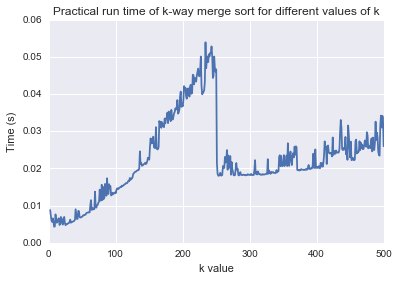

Best value of k:  8


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a line graph illustrating changes in runtime as k changes
# Note that we are sorting the same list from above
x, y = time_record(lst)
plt.plot(x, y)
plt.title( \
'Practical run time of k-way merge sort for different values of k')
plt.xlabel('k value')
plt.ylabel('Time (s)')
plt.show()

# Find value of k that takes the least time
a = y.index(min(y))
print "Best value of k: ", x[a]

Our simulation shows that the "best" k value is 8 for n = 500. Another interesting observation is how the "worst" k value is approximately n/2, which is true for multiple n values.

Enter the number of times to run the algorithm: 50
Enter the length of the list to be sorted: 500


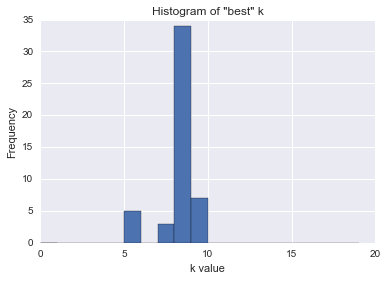

In [11]:
# Input: Desired length of a list of random integers to be sorted
# Output: The "best" value of k for that length
def best_k(length_list):
    x, y = time_record(rand_list(length_list))
    best_time = y.index(min(y))
    best_k = x[best_time]
    return best_k
    
num = eval(raw_input \
           ('Enter the number of times to run the algorithm: '))
length_list = eval(raw_input \
                 ('Enter the length of the list to be sorted: '))
best_k_list = []

# To minimalize the effect of randomization, reiterate to see the
# most popular k
for i in range(num):
    best_k_list.append(best_k(length_list))
plt.hist(best_k_list, bins = range(20))
plt.title('Histogram of "best" k')
plt.xlabel('k value')
plt.ylabel('Frequency')
plt.show()

To mitigate the effect of noises, we run the simulation multiple time to check which k value shows up most frequently as the "best" value, or in other words, the "true" best k value. The histogram above confirms that the "true" best k value is 8 for n = 500.

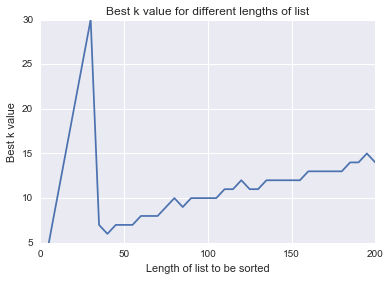

In [13]:
# Input: Number of iterations, desired length of a list of random 
# integers to be sorted
# Output: The most popular, or the "true" best k value
def most_common_k(num, length_list):
    best_k_list = []
    for i in range(num):
        best_k_list.append(best_k(length_list))
    mode = max(set(best_k_list), key=best_k_list.count)
    return mode

# Testing different lengths of unsorted list to see if the best k
# value has any relation to the length of the list:
mode_list = []
# List of lengths to be tested
n_list = range(5, 201, 5)
for n in n_list:
    mode_list.append(most_common_k(50, n))
plt.plot(n_list, mode_list)
plt.title('Best k value for different lengths of list')
plt.xlabel('Length of list to be sorted')
plt.ylabel('Best k value')
plt.show()

The line graph above shows the "true" best k value for different n values. In general, the "best" k value increases as n increases. Notice how in small data sets (as shown in the graph, this means n <= 30), the "best" k value is equal to n, which means selection sort is more efficient than k-way merge sort for any other values of k. We can also fit the data points outside of this range into a best fit line to get a linear equation to approximate the best k value to use. In this case, the best fit line for values of k >= 35 is y = 0.239x + 6.5241.